In [1]:

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

np.random.seed(0)

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
60000


[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


Text(0.5, 1.0, 'Distribution of the training dataset')

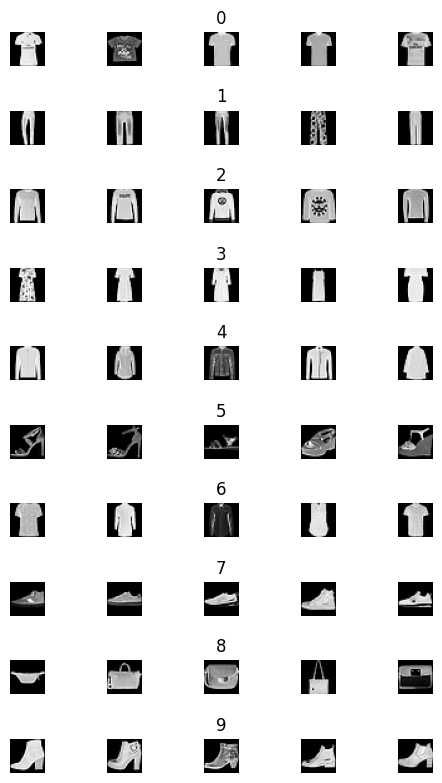

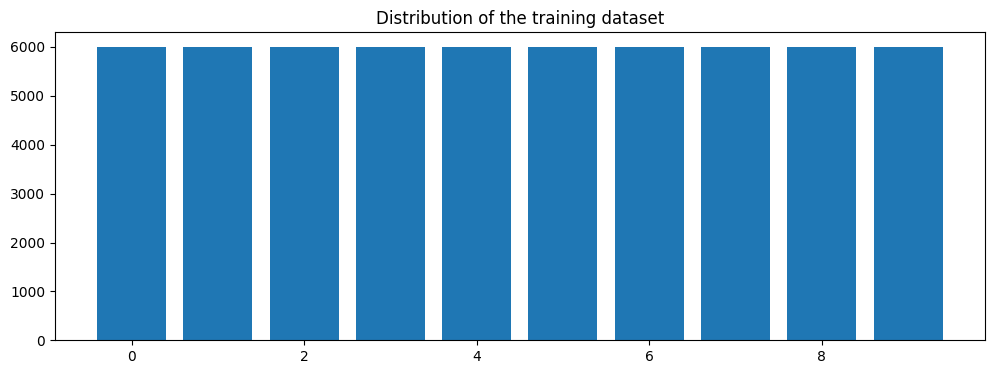

In [3]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [ ]:
def Lenet_model():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(Conv2D(30,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(200,activation='relu'))
  model.add(Dense(100,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


In [ ]:
model=Lenet_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 30)        22530     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 15)          4065      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 15)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 240)              

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1,
                    epochs = 10,
                    batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 3s 12ms/step - loss: 0.4409 - accuracy: 0.8641 - val_loss: 0.0952 - val_accuracy: 0.9738
Epoch 2/10
135/135 [==============================] - 2s 12ms/step - loss: 0.0916 - accuracy: 0.9726 - val_loss: 0.0652 - val_accuracy: 0.9820
Epoch 3/10
135/135 [==============================] - 2s 12ms/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0534 - val_accuracy: 0.9845
Epoch 4/10
135/135 [==============================] - 1s 10ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0515 - val_accuracy: 0.9880
Epoch 5/10
135/135 [==============================] - 1s 10ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0509 - val_accuracy: 0.9862
Epoch 6/10
135/135 [==============================] - 1s 10ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0481 - val_accuracy: 0.9885
Epoch 7/10
135/135 [==============================] - 1s 10ms/step - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.0455 - val_accuracy: 0.9895

Text(0.5, 0, 'epoch')

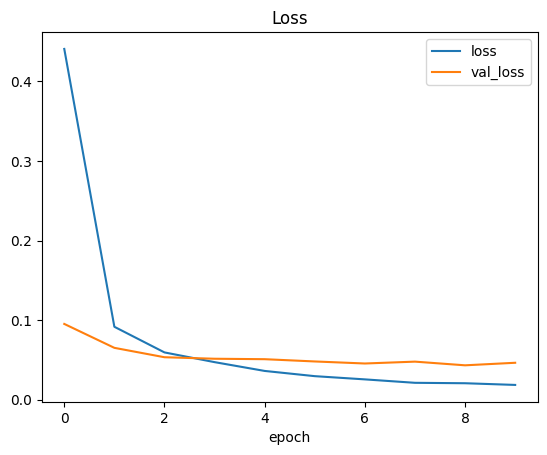

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

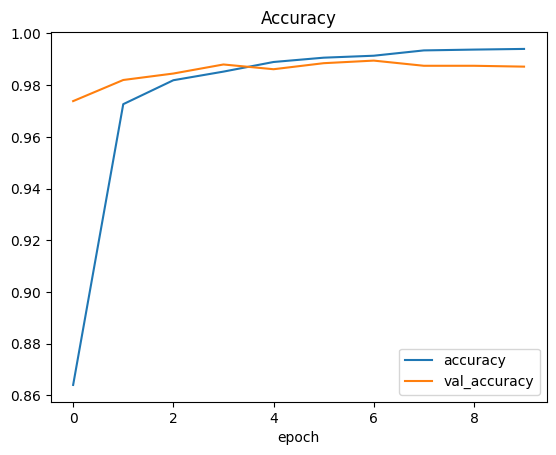

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
from google.colab import files
upload=files.upload()

Saving test image 2.png to test image 2 (1).png


In [ ]:
d=list(upload.keys())[0]
print(d)

test image 2 (1).png


[137  80  78 ...  66  96 130]


<ipython-input-37-59003df1124a>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


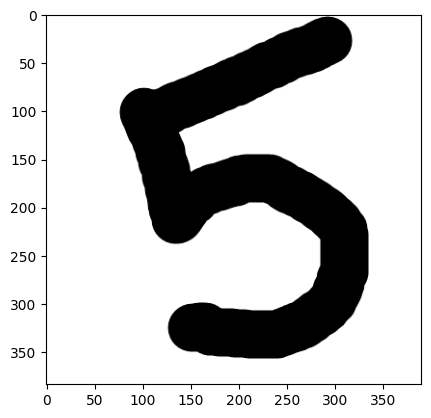

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

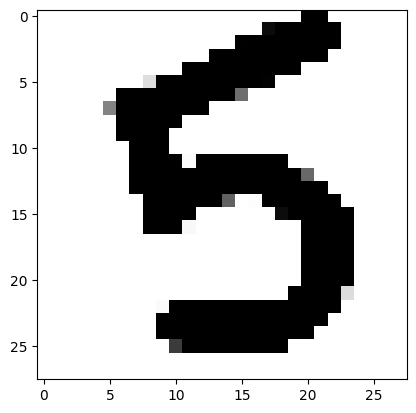

In [ ]:
img=cv2.resize(img,(28,28))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img=cv2.bitwise_not(img)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [ ]:
img=img/255
img=img.reshape(1,28,28,1)
prediction=model.predict(img)

1/1 [==============================] - 0s 117ms/step


In [ ]:
p=np.argmax(prediction,axis=1)

In [ ]:
p

array([3])